# Logistic_Regression using Scikit_Learn

#### Importing libraries and Data Visualisation

In this subtask, Scikit Learn based Logistic Regression model is used to train on 'ds1_train.csv' and then tested on 'ds1_test.csv'.

Numpy is used to create array and its functions are used such as exponential function, dot product, transpose of a matrix etc.

Pandas is used to read data from the csv files and convert it into list of arrays.

Matplotlib is used to draw various plots.

Sklearn is the most common machine learning library with many inbuilt functions

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

matplotlib inline is used to display plots directly within the notebook interface.

In [3]:
%matplotlib inline

The data from the csv files are extracted by pandas.read_csv function where it reads the data from the csv file and converts it into the dataframe.

In [4]:
# Initialising the traning and test examples
# df_train represents the traning DataFrame

df_train = pd.read_csv('ds1_train.csv')
df_test = pd.read_csv('ds1_test.csv')

In [5]:
# Printing the datframe df_train to see the type of data
# pandas.head(n) function is used to print the first n data entries of the respective dataframe. By default n=5

df_train.head(10)

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0
5,0.973922,41.677665,0.0
6,3.067275,143.275590,0.0
7,2.763094,35.969906,0.0
8,2.775772,29.569079,0.0
9,2.109830,76.636721,0.0


In [6]:
# It's important to check for the null values in both the training and the test dataset

print(df_train.isnull().sum())
print(df_test.isnull().sum())

x_1    0
x_2    0
y      0
dtype: int64
x_1    0
x_2    0
y      0
dtype: int64


In [7]:
# Printing the data entries of column y to see the types of labels
# pandas.value_counts() function is used to print the number of distinct entries in a particular coulmn

df_train['y'].value_counts()

0.0    400
1.0    400
Name: y, dtype: int64

In [8]:
X_train = df_train[['x_1', 'x_2']].values
y_train = df_train['y'].values

X_test = df_test[['x_1', 'x_2']]
y_test = df_test['y']

From the above few test runs, it is clear our dataset has 3 columns named as 'x_1', 'x_2' and y.
The total number of entries are 800. Column 'y' has only two labels 0 and 1.

#### Data Preprocessing

Let's analyse the data using the scatter plot

plt.scatter() This function is used to create a scatter plot, which is a graphical representation of data points on a two-dimensional plane. Each data point is represented by a dot on the plot, with its position determined by the values of two numeric variables.

Text(0.5, 1.0, 'Original plot of data')

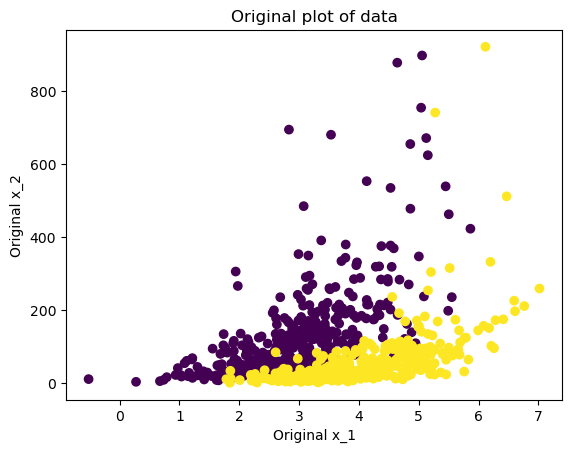

In [9]:
# The data is visualised on the scatter plot by plt.scatter
# plt.xlabel prints the label of the data displayed on tbe x axis
# plt.ylabel prints the label of the data displayed on tbe y axis
# plt.title prints the title of the plot to be displayed at the top

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Original x_1')
plt.ylabel('Original x_2')
plt.title("Original plot of data")

It is clear that the data is not evenly distributed as the scale on x axis is from 0 to 7 and the corresponding values on the opposite axis is from 0 to 800

Therefore, Scaling of data is required.

StandardScaler() normalizes the data in such a way that they have zero mean and unit variance. For that it perfroms the following task.

x_transformed = [ x - mean(x) ] / std(x)

mean is the mean of all the data of x and std refers to their corresponding standard deviation

Text(0.5, 1.0, 'Plot of StandardScaled() data')

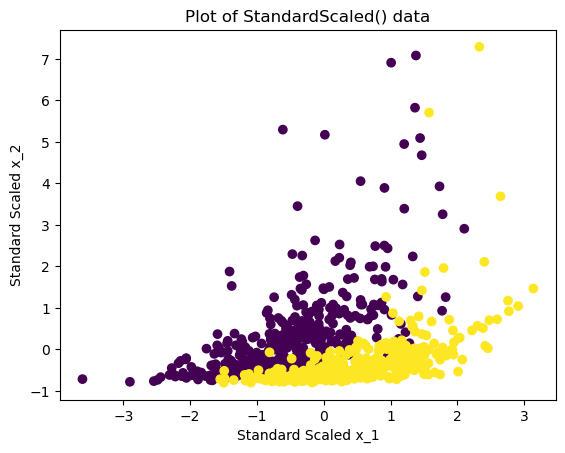

In [10]:
# The data is scaled by the StandardScaler() function
# .fit_transform() fits the data by scaling it through StandardScaler()
# The data is again visualised on the scatter plot by plt.scatter

X_train_new = StandardScaler().fit_transform(X_train)
plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train)
plt.xlabel('Standard Scaled x_1')
plt.ylabel('Standard Scaled x_2')
plt.title("Plot of StandardScaled() data")

The difference is clearly visible as now the data on both the axes have almost same scale-range which was not the the in the previous one.

StandardScaler() has scaled the data pretty much to be of the same scale range on both the axes but still the data is not evenly distributed. A large chunk of data is still collected at the bottom part wheras few data is scattered creating the noise.

To scale the data properly and even reduce the noise QuantileTransformer() is used.

QuantileTransformer divides the data into equal sized bins and scales the data on an scle of 0 to 1

Text(0.5, 1.0, 'Plot of QuantileTransformed() data')

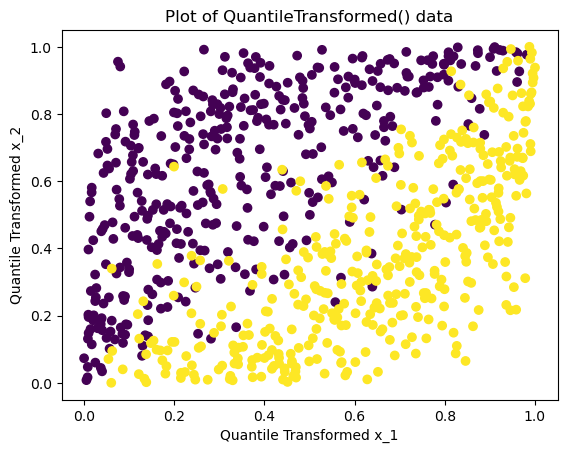

In [11]:
# QuantileTransformer() is used to scale the data to have a better plotting and hence better prediction.
# n_quartiles represent the number of segments the data will be broken into
# .fit_transform() fits tghe data by scaling it through QuantileTransformer function

X_train_new = QuantileTransformer(n_quantiles=100).fit_transform(X_train)
X_test_new = QuantileTransformer(n_quantiles=100).fit_transform(X_test)
plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train)
plt.xlabel('Quantile Transformed x_1')
plt.ylabel('Quantile Transformed x_2')
plt.title("Plot of QuantileTransformed() data")

This certainly is a better representation of data as now the data has been scaled on both the axes on the same scale range from 0 to 1

After preprocessing the data, the model is defined.

In [12]:
# Defining the LogisticRegression model
# max_iter is the number if iterations in which it would stop updating the theta parameter if the theta parameter does not converge.

model = LogisticRegression(max_iter=100)

### LogisticRegression() has many hyperparameter values such as penalty, solver and C.

The penalty parameter refers to a regularization term that is added to the loss function during the model training process. Regularization is a technique used to prevent overfitting, which occurs when a model performs well on the training data but fails to generalize to new, unseen data.
To mitigate overfitting, regularization is introduced, and there are two common types: 



1) L1 regularization (Lasso): This adds the absolute value of the coefficients' sum to the loss function. It tends to produce sparse models by encouraging some coefficients to be exactly zero.

2) L2 regularization (Ridge): This adds the squared value of the coefficients' sum to the loss function. It tends to spread the influence of the features across the model and reduce the impact of any single feature.

The 'solver' parameter is used to specify the optimization algorithm that will be used to find the optimal coefficients for the logistic regression model.
Here are some commonly used 'solver' options in scikit-learn's LogisticRegression:

1) 'liblinear': This is the default solver and is recommended for small datasets. It is based on the LIBLINEAR library and supports both L1 and L2 regularization.

2) 'newton-cg': This solver uses the Newton-Conjugate Gradient algorithm and is suitable for handling L2-regularized logistic regression. It is recommended for small to medium-sized datasets.

3) 'lbfgs': The Limited-memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS) algorithm is used for L2-regularized logistic regression. It is efficient and can handle medium to large-sized datasets.

4) 'sag': Stochastic Average Gradient (SAG) is a variant of the stochastic gradient descent algorithm that uses an average of gradients for better convergence speed. It is suitable for large datasets.

5) 'saga': This solver is an extension of 'sag' and also supports L1 regularization. It is recommended for large datasets and is often faster than 'sag' for L1-regularized problems

The 'C' parameter in LogisticRegression is the regularization parameter that controls the strength of regularization applied to the model. It is the inverse of the regularization strength; hence, smaller values of 'C' result in stronger regularization, while larger values of 'C' correspond to weaker regularization.

### GridSearchCV

GridSearchCV (Grid Search Cross-Validation) is a technique for hyperparameter tuning and model selection in machine learning. It is a systematic way of searching through a predefined set of hyperparameter values to find the combination that yields the best model performance. GridSearchCV is commonly used to optimize the hyperparameters of a machine learning model and improve its generalization on unseen data.

l1 regularization technique only works with 'saga' and 'liblinear' solvers and 'l2' works with all of them.

Solvers compatible with 'l1' regularization technique is gridsearched first and solvers compatible with 'l2' regualarization technique is gridsearched second. Thereby their respective highest accuarcy score are comapred and the one combination with the highest accuracy is taken. 

In [13]:
# Defining parameters to be tuned by GridSearchCV
# penalty parameter will be l1 
# C parameter will be any value between 0.1 and 5
# solver may be saga or liblinear

parameters = {
    'penalty': ['l1'],
    'C': np.linspace(0.1, 5, 100),
    'solver': ['saga', 'liblinear'],
}

GridSearchCV() takes three parameters 

1) model: It takes the machine learning model as input on which the data is to be trained

2) parameters: It takes the hyperparameters of the above prescribed model that are to be tuned

3) cv: It takes the input for cross-validation. In this, it breaks the data into the n units and then train the data on n-1 units and gets it checked by the nth data. It does it in n steps where every segment of data is tested one time. 

For example, cv=5 it breaks the data into 5 equal parts. Then it trains the data on first 4 parts and gets it tested by the 5th segement of data. Then it trains on 1st, 2nd, 3rd and 5th segements of data and gets it tested on 4th segment of data and so on.

In [14]:
# Defining GridSearchCV by the name grid
# Here the model is LogisticRegression with max_iterations assigned as 100
# parameters to be hypertuned are penalty,C and solver defined above
# cv is defined as 5 means it will break the data into 5 segment and will print each of its acuuracy

grid = GridSearchCV(model, parameters, cv=5)

# .fit() is used to fit the data in the object grid
# X_train_new is the QuantileTransformed dataset
# y_train is the target label of the training set

grid.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444, 0.69393939, 0.74343434, 0.79292929,
       0.84242424, 0.89191919, 0.94141414, 0.99090909, 1.04040404,
       1.08989899, 1.13939394, 1.18888889, 1.23838384, 1.28787879,
       1.33737374, 1.3...
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262626,
       3.81212121, 3.86161616, 3.91111111, 3.96060606, 4.01010101,
       4.05959596, 4.10909091, 4.15858586, 4.20808081, 4.25757576,
       4.30707071, 4.35656566, 4.40606061, 4.45555556, 4.50505051,
       4.55454545, 4.6040404 , 4.65353535, 4.7030303 , 4.75252525,
       4.8020202 , 4.85151515, 4.9010101 , 4.95050505, 5.        ]),
                         'penalty': ['l1'], 'solver': ['saga', 'liblinear']})

In [15]:
# .cv_results_ has a unique feature which comes with GridSearchCV
# This prints various information such as the parameters and their respective test scores and so on

# That tabular data is converted into a DataFrame to have a better visualisation of data
cv_score = pd.DataFrame(grid.cv_results_)
cv_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006561,0.003334,0.004453,0.003702,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.95625,0.88750,0.91875,0.91875,0.91250,0.91875,0.022009,5
1,0.002032,0.004064,0.002605,0.003205,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.95625,0.87500,0.90000,0.92500,0.90625,0.91250,0.027099,196
2,0.008287,0.005173,0.000000,0.000000,0.149495,l1,saga,"{'C': 0.14949494949494951, 'penalty': 'l1', 's...",0.95625,0.88125,0.91875,0.92500,0.91250,0.91875,0.024044,40
3,0.003301,0.006189,0.000000,0.000000,0.149495,l1,liblinear,"{'C': 0.14949494949494951, 'penalty': 'l1', 's...",0.95625,0.87500,0.90000,0.92500,0.90625,0.91250,0.027099,196
4,0.006395,0.007832,0.000000,0.000000,0.19899,l1,saga,"{'C': 0.198989898989899, 'penalty': 'l1', 'sol...",0.95625,0.88125,0.91875,0.93125,0.91250,0.92000,0.024495,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.007306,0.001399,0.000000,0.000000,4.90101,l1,liblinear,"{'C': 4.901010101010101, 'penalty': 'l1', 'sol...",0.95625,0.88125,0.92500,0.92500,0.90000,0.91750,0.025434,41
196,0.007642,0.000722,0.000471,0.000702,4.950505,l1,saga,"{'C': 4.9505050505050505, 'penalty': 'l1', 'so...",0.95625,0.88125,0.92500,0.92500,0.90000,0.91750,0.025434,41
197,0.007422,0.000944,0.000000,0.000000,4.950505,l1,liblinear,"{'C': 4.9505050505050505, 'penalty': 'l1', 'so...",0.95625,0.88125,0.92500,0.92500,0.90000,0.91750,0.025434,41
198,0.003303,0.004047,0.002955,0.005911,5.0,l1,saga,"{'C': 5.0, 'penalty': 'l1', 'solver': 'saga'}",0.95625,0.88125,0.92500,0.92500,0.90000,0.91750,0.025434,41


cv_score.nlargest() is used to print the combination with thw highest mean_test_score

.nlargest() takes two arguments in which the first parameter is th number of data to be printed after sorting it in descending order while the second argument is the coulmn on which the entries are to be sorted

In [16]:
# As only the data with the highest mean_test_score is required so the first argument is 1
# The data is to be sorted on the basis of mean_test_score

cv_score.nlargest(1, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.006395,0.007832,0.0,0.0,0.19899,l1,saga,"{'C': 0.198989898989899, 'penalty': 'l1', 'sol...",0.95625,0.88125,0.91875,0.93125,0.9125,0.92,0.024495,1


In [17]:
# Defining the parameters for l2 combinations

parameters = {
    'penalty': ['l2'],
    'C': np.linspace(0.1, 5, 100),
    'solver': ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear'],
}

In [18]:
# Defining the object of GridSearchCV

grid = GridSearchCV(model, parameters, cv=5)
grid.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444, 0.69393939, 0.74343434, 0.79292929,
       0.84242424, 0.89191919, 0.94141414, 0.99090909, 1.04040404,
       1.08989899, 1.13939394, 1.18888889, 1.23838384, 1.28787879,
       1.33737374, 1.3...
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262626,
       3.81212121, 3.86161616, 3.91111111, 3.96060606, 4.01010101,
       4.05959596, 4.10909091, 4.15858586, 4.20808081, 4.25757576,
       4.30707071, 4.35656566, 4.40606061, 4.45555556, 4.50505051,
       4.55454545, 4.6040404 , 4.65353535, 4.7030303 , 4.75252525,
       4.8020202 , 4.85151515, 4.9010101 , 4.95050505, 5.        ]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'sag', 'lbfgs', 'saga',
                                    'liblinear']})

In [19]:
# .cv_results_ has a unique feature which comes with GridSearchCV
# This prints various information such as the parameters and their respective test scores and so on

# That tabular data is converted into a DataFrame to have a better visualisation of data 
cv_score = pd.DataFrame(grid.cv_results_)
cv_score.nlargest(1, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
99,0.004412,0.002591,0.000415,0.00083,1.040404,l2,liblinear,"{'C': 1.0404040404040407, 'penalty': 'l2', 'so...",0.95625,0.8875,0.91875,0.93125,0.9125,0.92125,0.022569,1


It is clearly visible that the right combination will be obtained in l2 regularization only

In [20]:
# extracting the parameters with best accuracy
# .best_param_ gives the best parameters required for the maximum mean_test_score

grid.best_params_

{'C': 1.0404040404040407, 'penalty': 'l2', 'solver': 'liblinear'}

### Implementing the model

After preprocessing the data and finding the required parameters which would provide the best accuracy, its time to calculate the final accuracy.

In [21]:
# Defining the model
# The parameters are set according to the parameters' values obtained above
# .fit() function is used to fit X_train_new and y_train and train according to it
# X_train_new is the QuantileTransformed() dataset

model = LogisticRegression(C=1.04, penalty='l2', solver='liblinear').fit(X_train_new, y_train)

In [22]:
# .predict is used to predict the output based on the above learning
# It predicts the X_train_new datset

model.predict(X_train_new)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
# Accuracy of the predicted output is printed by accuracy_score method

X_train_prediction = model.predict(X_train_new)
train_accuracy = accuracy_score(y_train, X_train_prediction)

In [24]:
# Printing the accuracy on th training set by the above designed model
train_accuracy

0.92

Displaying the boundary line designed by the LogisticRegression() model

To display the boundary line, a set of points is generated to create the decision boundary line using the transformed data range. Then the coefficients and intercept are used to calculate the decision boundary line.

In [25]:
# Generating points to create the decision boundary line (using transformed data range)
# the minimum of x and y values are calculated using the below statements
# 0.1 is subtracted and added to the terms to ensure a buffer is created around the data points, so that the decision boundary line is not too close to the edge of the plot.

x_min, x_max = X_train_new[:, 0].min() - 0.1, X_train_new[:, 0].max() + 0.1
y_min, y_max = X_train_new[:, 1].min() - 0.1, X_train_new[:, 1].max() + 0.1

In [26]:
# The np.meshgrid() function creates a grid of points covering the 2D space defined by the x_min, x_max, y_min and y_max values.
# The np.linspace() function is used to create linearly spaced values between x_min and x_max, and between y_min and y_max. 
# The resulting xx and yy arrays represent the x and y coordinates of the grid points.

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# The np.c_[] function is used to concatenate xx and yy arrays along the second axis, creating a 2D array where each row represents a coordinate in the grid.
# ravel() is used to convert the 2D arrays into 1D arrays before concatenating, so that each row contains the (x, y) coordinate of a point in the grid.
# model is the pre-defined LogisticRegression model
# .predict gives the output of the input data based on the model trained earlier

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

After setting the points, the decision boundary line should be plotted

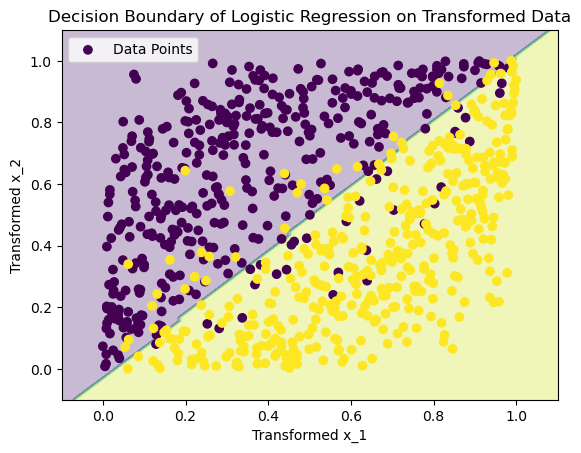

In [39]:
# Plot the decision boundary line
# Z is reshaped as the shape of xx array to plot the decision boundary line as a contour on the 2D plot

Z = Z.reshape(xx.shape)

# The plt.contourf() function is used to plot filled contours based on the Z array
# The xx and yy arrays define the coordinates
# The Z array defines the classes (decision boundaries) for each point in the grid
# The alpha parameter sets the transparency of the filled contours

plt.contourf(xx, yy, Z, alpha=0.3)

# Add labels and title to the plot

plt.xlabel('Transformed x_1')
plt.ylabel('Transformed x_2')
plt.title('Decision Boundary of Logistic Regression on Transformed Data')

# Creating a scatter plot of the transformed data points

plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train, label="Data Points")

# The legend provides an explanation of the various elements (e.g., data series, markers, colors) displayed on the plot
plt.legend()

Thus this the model with the transformed data and the required decision boundary

Predicting the test data

In [43]:
# Accuracy of the predicted output is printed by accuracy_score method

X_test_prediction = model.predict(X_test_new)
test_accuracy = accuracy_score(y_test, X_test_prediction)

In [44]:
test_accuracy

0.92

This model gives an accuracy of 0.92 on the training and test data as well

To get a better idea about the model confusion matrix, precision score, recall score and f1 score are defined

### Mertrics Evaluation

A confusion matrix is a table used to evaluate the performance of a classification model by comparing its predicted labels against the actual labels.

It provides a clear representation of the model's true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions.

The main diagonal of the confusion matrix contains the correct predictions (TP and TN), and the off-diagonal elements represent incorrect predictions (FP and FN)

In [45]:
# Implementing the Confusion matrix

cf_matrix_train = confusion_matrix(y_train, X_train_prediction)
cf_matrix_test = confusion_matrix(y_test, X_test_prediction)

print('Training Confusion Matrix: \n', cf_matrix_train)
print('Testing Confusion Matrix: \n', cf_matrix_test)


Training Confusion Matrix: 
 [[367  33]
 [ 31 369]]
Testing Confusion Matrix: 
 [[45  5]
 [ 3 47]]


Precision is a measure of how many of the predicted positive instances are actually positive.

It is the ratio of the positive cases predicted as positive and the total number of actual positive cases.

In [46]:
x_train_precision = precision_score(y_train, X_train_prediction)
print('Training Data Precision: ', x_train_precision)
x_test_precision = precision_score(y_test, X_test_prediction)
print('Testing Data Precision: ', x_test_precision)

Training Data Precision:  0.917910447761194
Testing Data Precision:  0.9038461538461539


Recall is a measure of how many of the actual positive instances are correctly predicted as positive by the model.

It is the ratio of correct positive cases and the total cases predicted as positive

In [47]:
# Implementing recall score

x_train_recall = recall_score(y_train, X_train_prediction)
print('Training Data Recall: ', x_train_recall)
x_test_recall = recall_score(y_test, X_test_prediction)
print('Testing Data Recall: ', x_test_recall)

Training Data Recall:  0.9225
Testing Data Recall:  0.94


The F1 score is the harmonic mean of precision and recall. 

It balances precision and recall and provides a single metric to evaluate the model's performance

In [48]:
x_train_f1score = f1_score(y_train, X_train_prediction)
print('Training Data F1_score: ', x_train_f1score)

x_test_f1score = f1_score(y_test, X_test_prediction)
print('Testing Data F1_score: ', x_test_f1score)

Training Data F1_score:  0.9201995012468828
Testing Data F1_score:  0.9215686274509804


It is clear that the above designed model is a pretty good model

### Comparison with the model built from scratch

The accuracy of model built from scratch as described in Sub_Task_2 is 

0.8775 for the training set

0.9 for the test set

The accuracy of model built using scikit-learn libraries is 

0.92 for the training set

0.92 for the test set

# Thank You